In [2]:
from google.colab import drive
drive.mount('/content/drive')

Set which dataset we want to analyze. The code has been built such that toggling the flag to the dataset 1 (alphabet) or 2 (greek letters) will work.

In [1]:
dataset = "1"

# Part 1: Plot the distribution of the number of the instances in each class.

Import required packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Import information about the dataset.

In [3]:
f = open("./Assig1-Dataset/info_" + dataset + ".csv")
f.readline() #skip header line
infoData = np.loadtxt(f, dtype={'names': ('index', 'label'), 'formats': ('i4', 'U1')  }, delimiter = ',')

print(infoData)

[( 0, 'A') ( 1, 'B') ( 2, 'C') ( 3, 'D') ( 4, 'E') ( 5, 'F') ( 6, 'G')
 ( 7, 'H') ( 8, 'I') ( 9, 'J') (10, 'K') (11, 'L') (12, 'M') (13, 'N')
 (14, 'O') (15, 'P') (16, 'Q') (17, 'R') (18, 'S') (19, 'T') (20, 'U')
 (21, 'V') (22, 'W') (23, 'X') (24, 'Y') (25, 'Z')]


Declare function to import and return data. Importdataset. 

The format of the dataset is a table with 1025 columns (1024 representing features, ie black & white image pixels, and the last column represents the label of the encoded image which corresponds to the above label-index pairing).

In [4]:
def importData(path):
    f = open(path)
    f.readline() #skip header line
    data = np.loadtxt(f, delimiter = ',', dtype="i4")
    print(data)
    return data

Declare function to plot the histogram of data by plotting labels (last column of data).

In [5]:
def plot(data, infoData):
    plt.hist(data[:,1024], bins = len(infoData))
    plt.show()

[[ 1  1  1 ...  1  1 14]
 [ 1  1  1 ...  1  1  4]
 [ 1  1  1 ...  1  1 12]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 0  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1 16]]


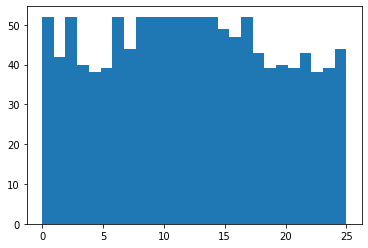

In [6]:
trainingData = importData("./Assig1-Dataset/train_" + dataset + ".csv")
plot(trainingData, infoData)

Import training data and plot histogram of training data.

Import validation data and plot histogram of validation data.

[[ 1  1  1 ...  0  0 17]
 [ 1  1  1 ...  1  1 12]
 [ 1  1  1 ...  1  1 12]
 ...
 [ 1  1  1 ...  0  0  2]
 [ 1  1  1 ...  1  1  8]
 [ 1  1  1 ...  1  1  5]]


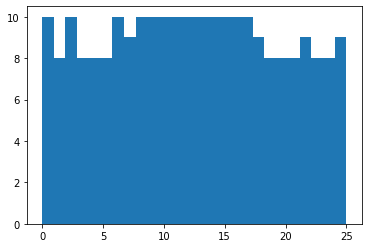

In [7]:
validationData = importData("./Assig1-Dataset/val_" + dataset + ".csv")
plot(validationData, infoData)

Import testing data and plot histogram of testing data.

[[ 1  1  1 ...  1  1 13]
 [ 1  1  1 ...  1  1  7]
 [ 1  1  1 ...  1  1  2]
 ...
 [ 1  1  1 ...  1  1 17]
 [ 1  1  1 ...  1  1  6]
 [ 1  1  0 ...  1  1 19]]


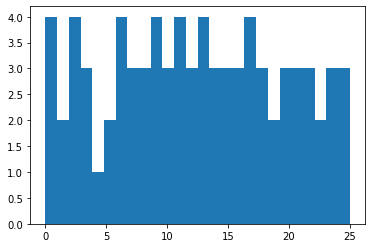

In [8]:
testingData = importData("./Assig1-Dataset/test_with_label_" + dataset + ".csv")
plot(testingData, infoData)

***

# Part 2: Run 6 ML models

## Part 2.A: Gaussian Naive Bayes

A Gaussian Naive Bayes Classifier, with default parameter values.

Imports and setup.

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

clf = GaussianNB()

Arrange data.

In [30]:
features = trainingData[:,0:1023] # size [n_samples, n_features]
labels = trainingData[:,1024] # size [n_samples]

print(features)
print(labels)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 1]]
[14  4 12 ...  1  1 16]


Training.

In [31]:
clf.fit(features,labels)

GaussianNB()

Testing.

In [32]:
features = testingData[:,0:1023] # size [n_samples, n_features]
labels = testingData[:,1024] # size [n_samples]

predictedValues = clf.predict(features)
analyzeModelAndOutput(labels, predictedValues)

14,1
8,22
3,2
19,12
18,2
26,22
24,16
23,17
21,0
7,23
10,6
12,11
20,16
2,7
6,25
2,7
9,20
3,2
13,19
17,8
1,13
26,22
18,2
17,8
2,7
23,17
9,20
22,25
13,19
2,7
13,19
11,9
17,8
11,9
18,2
17,8
2,7
16,1
13,19
17,8
12,11
14,1
2,7
14,1
18,2
13,19
15,5
25,1
1,13
1,13
4,18
23,17
21,0
4,18
15,5
26,22
10,6
16,1
15,5
14,1
3,2
12,11
13,19
18,2
7,23
7,23
21,0
14,1
4,18
25,1
23,17
22,25
9,20
22,25
19,12
1,13
18,2
13,19
20,16

Confusion Matrix:
[[2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part 2.B: Base decision tree

A baseline Decision Tree using entropy as decision criterion and using default values values for the rest of the parameters.

Imports.

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

Arrange data.

In [21]:
features = trainingData[:,0:1023] # size [n_samples, n_features]
labels = trainingData[:,1024] # size [n_samples]

print(features)
print(labels)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 1]]
[14  4 12 ...  1  1 16]


Act. Create decision tree with scikit learn, using entropy as the criterion. Pass in trainingData as features and labels. The result is a trained decision tree *clf*.

In [22]:
decisionTree = tree.DecisionTreeClassifier(criterion="entropy")
decisionTree = decisionTree.fit(X=features, y=labels)

Analyze. Plot tree and export to text file to see the results.

|--- feature_47 <= 0.50
|   |--- feature_42 <= 0.50
|   |   |--- feature_56 <= 0.50
|   |   |   |--- feature_488 <= 0.50
|   |   |   |   |--- feature_1007 <= 0.50
|   |   |   |   |   |--- feature_377 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_377 >  0.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_1007 >  0.50
|   |   |   |   |   |--- feature_937 <= 0.50
|   |   |   |   |   |   |--- feature_264 <= 0.50
|   |   |   |   |   |   |   |--- feature_398 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_398 >  0.50
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_264 >  0.50
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_937 >  0.50
|   |   |   |   |   |   |--- feature_205 <= 0.50
|   |   |   |   |   |   |   |--- class: 15
|   |   |   |   |   |   |--- feature_205 >  0.50
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |--- f

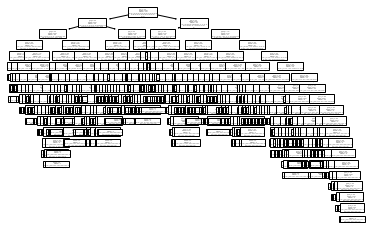

In [23]:
tree.plot_tree(decisionTree)

r = export_text(decisionTree)
print(r)

Validate decision tree using validation data.

In [25]:
features = validationData[:,0:1023] # size [n_samples, n_features]
labels = validationData[:,1024] # size [n_samples]

# apply decision "tree on data
predictedValues = decisionTree.predict(features)

analyzeModelAndOutput(labels, predictedValues)


18,11
13,15
11,25
2,12
14,1
16,2
10,9
10,9
18,11
10,9
26,5
23,16
16,2
2,12
25,12
3,10
2,12
12,22
16,2
20,19
10,9
20,19
17,1
25,12
13,15
6,15
19,15
12,22
3,10
16,2
21,9
21,9
1,17
24,24
2,12
11,25
23,16
9,17
23,16
10,9
20,19
19,15
21,9
9,17
20,19
15,24
23,16
22,19
3,10
11,25
24,24
13,15
8,9
17,1
3,10
3,10
1,17
21,9
15,24
12,22
7,9
20,19
14,1
14,1
7,9
26,5
20,19
23,16
12,22
1,17
18,11
2,12
5,13
8,9
7,9
4,1
20,19
2,12
4,1
13,15
21,9
10,9
6,15
8,9
17,1
1,17
5,13
15,24
9,17
10,9
11,25
26,5
6,15
2,12
6,15
3,10
1,17
17,1
22,19
15,24
21,9
13,15
14,1
1,17
25,12
17,1
26,5
17,1
14,1
3,10
19,15
12,22
15,24
24,24
22,19
21,9
18,11
5,13
17,1
1,17
18,11
12,22
16,2
16,2
12,22
7,9
8,9
26,5
13,15
21,9
17,1
18,11
18,11
15,24
20,19
23,16
11,25
24,24
14,1
24,24
9,17
19,15
4,1
10,9
7,9
3,10
3,10
4,1
12,22
23,16
26,5
13,15
5,13
11,25
26,5
5,13
1,17
21,9
1,17
12,22
6,15
1,17
13,15
24,24
3,10
12,22
14,1
11,25
7,9
6,15
23,16
12,22
20,19
15,24
16,2
21,9
20,19
1,17
9,17
12,22
3,10
5,13
6,15
9,17
20,19
12,22
23,16
3

In [26]:
from sklearn.neural_network import MLPClassifier

# setup multi-layered perceptron
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')

Arrange, train, test.

In [27]:
features = trainingData[:,0:1023] # size [n_samples, n_features]
labels = trainingData[:,1024] # size [n_samples]

#train
mlp = mlp.fit(features, labels)



/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:

features = testingData[:,0:1023] # size [n_samples, n_features]
labels = testingData[:,1024] # size [n_samples]

#test
predictedValues = mlp.predict(features)
analyzeModelAndOutput(labels, predictedValues)

14,2
18,2
3,2
18,2
18,2
12,11
18,2
23,17
12,11
3,2
10,2
12,11
9,11
3,2
11,9
1,13
9,11
3,2
1,13
15,10
1,13
3,2
18,2
9,11
18,2
12,11
9,11
18,2
7,17
15,10
14,2
11,9
15,10
11,9
11,9
15,10
9,11
9,11
13,8
17,8
11,9
14,2
11,9
18,2
18,2
13,8
15,10
18,2
1,13
14,2
9,11
11,9
11,9
15,10
15,10
9,11
10,2
18,2
15,10
14,2
12,11
12,11
3,2
18,2
7,17
7,17
12,11
13,8
14,2
14,2
12,11
14,2
9,11
12,11
3,2
11,9
18,2
7,17
9,11

Confusion Matrix:
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part 2.F: Best-MLP: (Multi-Layered Perceptron)
a better performing Multi-Layered Perceptron found by performing grid search to find the
best combination of hyper-parameters.

Imports and Setup.

# Part 3: (Work in progress) Function that can output the results of the models to a text file

In [9]:
def analyzeModelAndOutput(actual_values, predicted_values):
    for i in predicted_values:
        print(""+str(i+1)+","+str(predicted_values[i]))
   
    # get confusion matrix using predicted results and actual results (labels)
    confusionMatrix = confusion_matrix(actual_values, predicted_values)
    print("\nConfusion Matrix:")
    print(confusionMatrix)

    print("\n============")

    # get precision recall fscore support for each class using the predicted results and actual results (labels)
    (precision, recall, fscore, _) = precision_recall_fscore_support(actual_values, predicted_values)
    print("\nPrecision:")
    print(precision)
    print("\nRecall:")
    print(recall)
    print("\nF-Score:")
    print(fscore)

    print("\n============")

    # get accuracy, macro-average f1 and weighted-average f1 of the model using the predicted results and actual results (labels)
    (_, _, macroAverageFScore, _) = precision_recall_fscore_support(actual_values, predicted_values, average="macro")
    (_, _, weightedAverageFScore, _) = precision_recall_fscore_support(actual_values, predicted_values, average="weighted")
    accuracyScore = accuracy_score(actual_values, predicted_values)
    print("\nMacro Average F-Score:")
    print(macroAverageFScore)
    print("\nWeighted Average F-Score:")
    print(weightedAverageFScore)
    print("\nAccuracy Score:")
    print(accuracyScore)